In [1]:
import numpy as np
import matplotlib.pyplot as plt

from __future__ import print_function

import os
import subprocess

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_graphviz

from sklearn import tree

from sklearn.metrics import mean_squared_error

In [2]:
# Retrieve current working directory (`cwd`)
cwd = os.getcwd()
cwd

# Change directory 
os.chdir(r"C:\Users\Swetta\Desktop\DataMining-master\Data")

# List all files and directories in current directory
os.listdir('.');


# Decision trees: Per participant

In [51]:
patient = 26

# Read the CSV files list_onlyTargets and filter the participant
df = pd.read_csv('list_nonNA.csv')
df_p20 = df.loc[df['Participant']==patient]

# Fetch Day en Target mood
df_p20_day = df_p20['Day']
df_p20_mood = df_p20['Target']

# Reshape to useable data
X_day = df_p20_day.tolist()
Y_mood = df_p20_mood.tolist()

# Train part is 4/5 of the data and test part 1/4
train = int(np.ceil((len(df_p20)/6)*4))
eva =int(np.floor((len(df_p20)/6)*1))
test = int(len(df_p20)-train-eva)

# Fetch features to train on
df_p20_features = df_p20[[ 'Utilities', 'Activity (t-2)', 'Screen (t-2)', 'Arousal', 'Calls']]

# Training set of Features and Target mood and test set of evaluation
df_p20_mood_train = df_p20_mood.iloc[:train]
df_p20_train = df_p20.iloc[:train] 

df_p20_eva = df_p20.iloc[train-1:train+eva] 

#  Training + evaluation set and test set
df_p20_mood_train_eva = df_p20_mood.iloc[:train+eva]
df_p20_train_eva = df_p20.iloc[:train+eva]

df_p20_test = df_p20.iloc[train+eva-1:train+test+eva]

# Extracting features to train on
features = list(df_p20_features.columns[:5])

# Rename training set to X and y
X1 = df_p20_train[features].dropna(axis=0, how='any')
y1 = df_p20_mood_train

# Determine depth of tree and train the set
MSE_mean_list = []
tree_list = []
for t in range(1,200,1):
    regressor = tree.DecisionTreeRegressor(max_depth = t)

    MSE_list1 = []
    for i in range(100):
        model1 = regressor.fit(X1, y1)
        tested_model1 = model1.predict(df_p20_eva[features])
        MSE_list1.append(mean_squared_error(Y_mood[train-1:train+eva], tested_model1))
    
    MSE_mean_list.append(sum(MSE_list1)/100)
    tree_list.append(t)
    
dtree = (tree_list[np.argmin(MSE_mean_list)])

regressor = tree.DecisionTreeRegressor(max_depth = dtree)

MSE_list1 = []
for i in range(100):
    model1 = regressor.fit(X1, y1)
    tested_model1 = model1.predict(df_p20_eva[features])
    MSE_list1.append(mean_squared_error(Y_mood[train-1:train+eva], tested_model1))
    
print('Patient nr:', patient)
print('Depth tree:',dtree)
print('Nr of features:', len(features))
print('Features used:', features)
print('Model: 1')
print('Mean MSE:', sum(MSE_list1)/100)  

Patient nr: 26
Depth tree: 1
Nr of features: 5
Features used: ['Utilities', 'Activity (t-2)', 'Screen (t-2)', 'Arousal', 'Calls']
Model: 1
Mean MSE: 0.729098125377


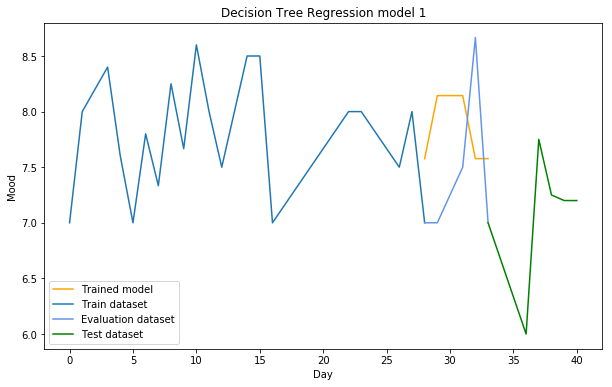

In [4]:
# Plot test and originl data
plt.figure(figsize=(10,6))
plt.plot(X_day[train-1:train+eva], tested_model1, color="orange",
         label="Trained model")
plt.plot(X_day[:train], Y_mood[:train], label="Train dataset")
plt.plot(X_day[train-1:train+eva], Y_mood[train-1:train+eva], label="Evaluation dataset",color="cornflowerblue")
plt.plot(X_day[train+eva-1:train+eva+test], Y_mood[train+eva-1:train+eva+test], label="Test dataset",color="green")
plt.xlabel("Day")
plt.ylabel("Mood")
plt.title("Decision Tree Regression model 1")
plt.legend()
plt.show()


# Evaluation per participant

In [ ]:
patient = 26
dtree = 188

# Read the CSV files list_onlyTargets and filter the participant
df = pd.read_csv('list_nonNA.csv')
df_p20 = df.loc[df['Participant']==patient]

# Fetch Day en Target mood
df_p20_day = df_p20['Day']
df_p20_mood = df_p20['Target']

# Reshape to useable data
X_day = df_p20_day.tolist()
Y_mood = df_p20_mood.tolist()

# Train part is 4/5 of the data and test part 1/4
train = int(np.ceil((len(df_p20)/6)*4))
eva =int(np.floor((len(df_p20)/6)*1))
test = int(len(df_p20)-train-eva)

# Fetch features to train on
df_p20_features = df_p20[['Mood', 'Calls']]


#  Training + evaluation set and test set
df_p20_mood_train_eva = df_p20_mood.iloc[:train+eva]
df_p20_train_eva = df_p20.iloc[:train+eva]

df_p20_test = df_p20.iloc[train+eva-1:train+test+eva]

# Extracting features to train on
features = list(df_p20_features.columns[:5])

# Rename training set to X and y
X2 = df_p20_train_eva[features]
y2 = df_p20_mood_train_eva

regressor = tree.DecisionTreeRegressor(max_depth = dtree)

MSE_list2 = []
for i in range(100):
    model2 = regressor.fit(X2, y2)
    tested_model2 = model2.predict(df_p20_test[features])
    MSE_list2.append(mean_squared_error(Y_mood[train+eva-1:train+test+eva], tested_model2))


print('Patient nr:', patient)
print('Depth tree:',dtree)
print('Nr of features:', len(features))
print('Features used:', features)
print('Model: Test set')
print('Mean MSE:', sum(MSE_list2)/100)  


plt.figure(figsize=(10,6))
plt.plot(X_day[train+eva-1:train+test+eva], tested_model2, color="orange",
         label="Trained model")
plt.plot(X_day[:train+eva], Y_mood[:train+eva], label="Train dataset")
plt.plot(X_day[train+eva-1:train+test+eva], Y_mood[train+eva-1:train+test+eva], label="Test dataset",color="cornflowerblue")
plt.xlabel("Day")
plt.ylabel("Mood")
plt.title("Decision Tree Regression model 2")
plt.legend()
plt.show()

# Decision tree: All participants

In [68]:
# Read the CSV files list_onlyTargets and filter the participant
df = pd.read_csv('list_nonNA.csv');
df = df.fillna(0);

df_p20_train = df.loc[df['Participant'] < 24]
df_p20_eva = df.loc[df['Participant']== 24].append(df.loc[df['Participant']== 25])
df_p20_test = df.loc[df['Participant']== 26].append(df.loc[df['Participant']== 27])

# Fetch Day en Target mood
df_p20_day = df_p20_eva['Day']
df_p20_mood = df_p20_eva['Target']

# Reshape to useable data
X_day = df_p20_day.tolist()
Y_mood = df_p20_mood.tolist()

# Fetch features to train on
df_p20_train_features = df_p20_train[[ 'Mood', 'Valence (t-3)', 'Mood (t-1)', 'Valence', 'Entertainment']]

# Training set of Features and Target mood and test set of evaluation
df_p20_mood_train = df_p20_train['Target']
df_p20_train = df.loc[df['Participant'] < 24]

df_p20_eva =  df.loc[df['Participant']== 24].append(df.loc[df['Participant']== 25])

# Extracting features to train on
features = list(df_p20_features.columns[:5])

# Rename training set to X and y
X1 = df_p20_train[features]
y1 = df_p20_mood_train

# Determine depth of tree and train the set
MSE_mean_list = []
tree_list = []
for t in range(1,200,1):
    regressor = tree.DecisionTreeRegressor(max_depth = t)

    MSE_list1 = []
    for i in range(100):
        model1 = regressor.fit(X1, y1)
        tested_model1 = model1.predict(df_p20_eva[features])
        MSE_list1.append(mean_squared_error(Y_mood, tested_model1))
    
    MSE_mean_list.append(sum(MSE_list1)/100)
    tree_list.append(t)
    
dtree = (tree_list[np.argmin(MSE_mean_list)])

regressor = tree.DecisionTreeRegressor(max_depth = dtree)

MSE_list1 = []
for i in range(100):
    model1 = regressor.fit(X1, y1)
    tested_model1 = model1.predict(df_p20_eva[features])
    MSE_list1.append(mean_squared_error(Y_mood, tested_model1))

print('Depth tree:',dtree)
print('Nr of features:', len(features))
print('Features used:', features)
print('Model: 1')
print('Mean MSE:', sum(MSE_list1)/100)  

Depth tree: 3
Nr of features: 5
Features used: ['Utilities', 'Activity (t-2)', 'Screen (t-2)', 'Arousal', 'Calls']
Model: 1
Mean MSE: 0.478186737628


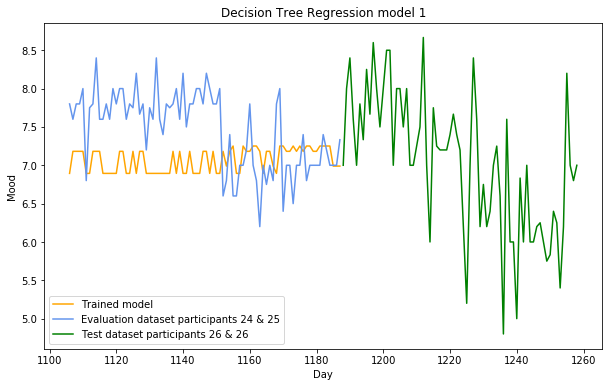

In [72]:
eva_day = np.arange(1106, 1106+82, 1)
eva_mood = df_p20_eva['Target']

train_day = np.arange(0,1106,1)
train_mood = df_p20_train['Target']
test_day = np.arange(1106+82,1106+82+71,1)
test_mood = df_p20_test['Target'] 


# Plot test and originl data
plt.figure(figsize=(10,6))
plt.plot(eva_day, tested_model1, color="orange",
         label="Trained model")
# plt.plot(train_day, train_mood, label="Train dataset")
plt.plot(eva_day, eva_mood, label="Evaluation dataset participants 24 & 25",color="cornflowerblue")
plt.plot(test_day, test_mood, label="Test dataset participants 26 & 27",color="green")
plt.xlabel("Day")
plt.ylabel("Mood")
plt.title("Decision Tree Regression model 1")
plt.legend()
plt.show()


# Evaluation all participants

In [62]:
# Read the CSV files list_onlyTargets and filter the participant
df = pd.read_csv('list_nonNA.csv');
df = df.fillna(0);

df_p20_train = df.loc[df['Participant'] < 24]
df_p20_eva = df.loc[df['Participant']== 24].append(df.loc[df['Participant']== 25])
df_p20_test = df.loc[df['Participant']== 26].append(df.loc[df['Participant']== 27])
df_p20_train_eva = df_p20_train.append(df_p20_eva)

# Fetch Day en Target mood
df_p20_day = df_p20_test['Day']
df_p20_mood = df_p20_test['Target']

# Reshape to useable data
X_day = df_p20_day.tolist()
Y_mood = df_p20_mood.tolist()

# Fetch features to train on
df_p20_train_features = df_p20_train[[ 'Mood', 'Valence (t-3)', 'Mood (t-1)', 'Valence', 'Entertainment']]

# Training set of Features and Target mood and test set of evaluation
df_p20_mood_train = df_p20_train_eva['Target']
df_p20_train = df.loc[df['Participant'] < 26]

df_p20_test = df.loc[df['Participant']== 26].append(df.loc[df['Participant']== 27])

# Extracting features to train on
features = list(df_p20_features.columns[:5])

# Rename training set to X and y
X1 = df_p20_train[features]
y1 = df_p20_mood_train

regressor = tree.DecisionTreeRegressor(max_depth = dtree)

MSE_list2 = []
for i in range(100):
    model2 = regressor.fit(X1, y1)
    tested_model2 = model2.predict(df_p20_test[features])
    MSE_list1.append(mean_squared_error(Y_mood, tested_model2))
    
print('Depth tree:',dtree)
print('Nr of features:', len(features))
print('Features used:', features)
print('Model: 1')
print('Mean MSE:', sum(MSE_list1)/100)  

Depth tree: 3
Nr of features: 5
Features used: ['Utilities', 'Activity (t-2)', 'Screen (t-2)', 'Arousal', 'Calls']
Model: 1
Mean MSE: 1.95347475853


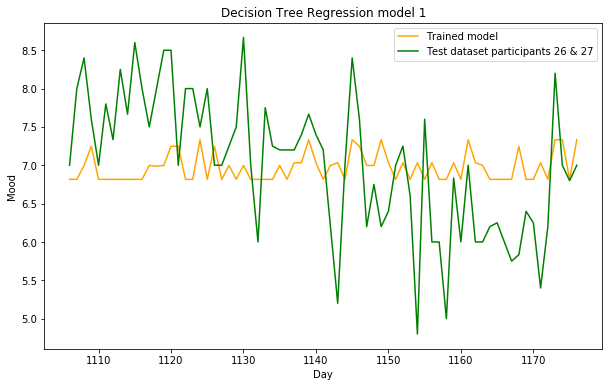

In [73]:
dtree = 3

eva_day = np.arange(1024, 1024+82, 1)
eva_mood = df_p20_eva['Target']
train_day = np.arange(0,1024,1)
train_mood = df_p20_train['Target']
test_day = np.arange(1024+82,1024+82+71,1)
test_mood = df_p20_test['Target'] 


# Plot test and originl data
plt.figure(figsize=(10,6))
plt.plot(test_day, tested_model2, color="orange",
         label="Trained model")
# plt.plot(train_day, train_mood, label="Train dataset")
plt.plot(test_day, test_mood, label="Test dataset participants 26 & 27",color="green")
plt.xlabel("Day")
plt.ylabel("Mood")
plt.title("Decision Tree Regression model 1")
plt.legend()
plt.show()